In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bezierv.classes.bezierv import Bezierv
from bezierv.algorithms.proj_grad import ProjGrad
from bezierv.algorithms.conv_bezierv import ConvBezier

In [2]:
np.random.seed(0)
x = np.sort(np.random.normal(1, 1, 400))
y = np.sort(np.random.normal(4, 1, 400))

In [3]:
n = 6
bezierv_x = Bezierv(n)
bezierv_y = Bezierv(n)

bx_controls_x = np.linspace(min(x), max(x), n + 1)
bx_controls_z = np.linspace(0, 1, n + 1)
by_controls_x = np.linspace(min(y), max(y), n + 1)
by_controls_z = np.linspace(0, 1, n + 1) 

In [4]:
projgrad_x = ProjGrad(bezierv_x, bx_controls_x, x)
projgrad_y = ProjGrad(bezierv_y, by_controls_x, y)

bezierv_x_fitted = projgrad_x.fit(bx_controls_z)
bezierv_y_fitted = projgrad_y.fit(by_controls_z)

Converged in 42 iterations
Converged in 16 iterations


In [5]:
projgrad_x.fit_error

np.float64(0.00016480477643246582)

In [6]:
projgrad_y.fit_error

np.float64(0.0010321520851263733)

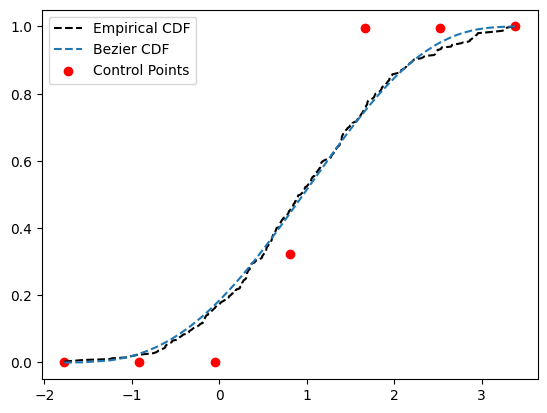

In [7]:
bezierv_x_fitted.plot_cdf(x)

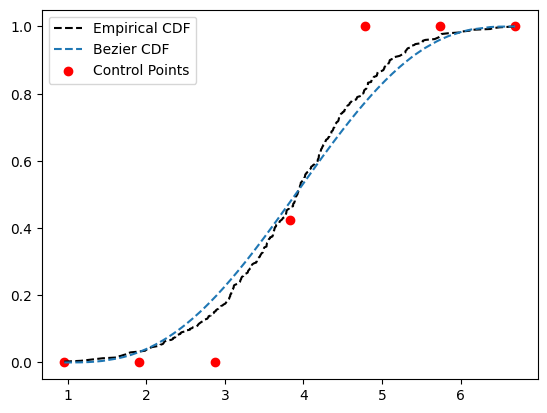

In [8]:
bezierv_y_fitted.plot_cdf(y)

C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Primer Semestre - MIND\Research\bezierv\bezierv\classes\bezierv.py:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


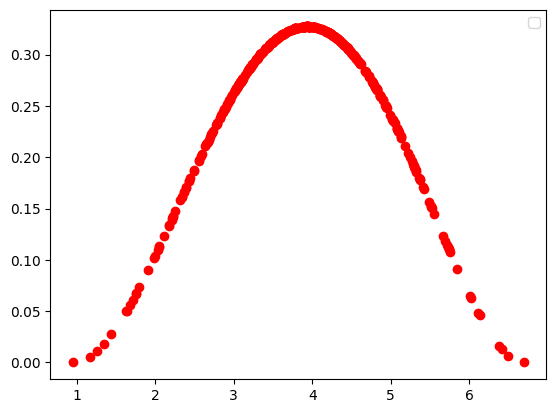

In [9]:
bezierv_y_fitted.plot_pdf(y)

In [10]:
from scipy.integrate import quad
result, error = quad(bezierv_x_fitted.pdf_x, x[0], x[-1])
result


0.9999999999999999

In [11]:
convoluter = ConvBezier(bezierv_x_fitted, bezierv_y_fitted, m=100)
convoluter.cdf_z(5)

0.5419984800619084

In [12]:
bezierv_conv = convoluter.conv()

Converged in 81 iterations


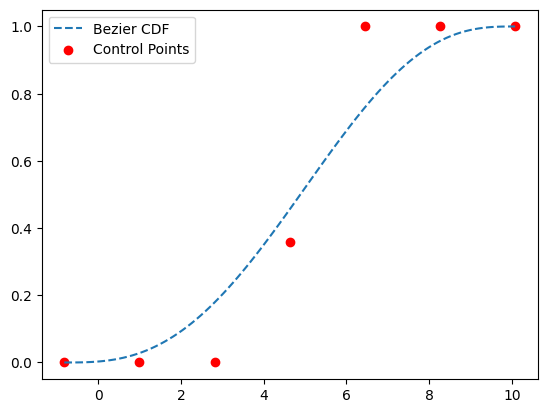

In [14]:
bezierv_conv.plot_cdf(convoluter.data, ecdf=False)

C:\Users\esteb\OneDrive - Universidad de los andes\Documentos\ANDES\Primer Semestre - MIND\Research\bezierv\bezierv\classes\bezierv.py:178: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


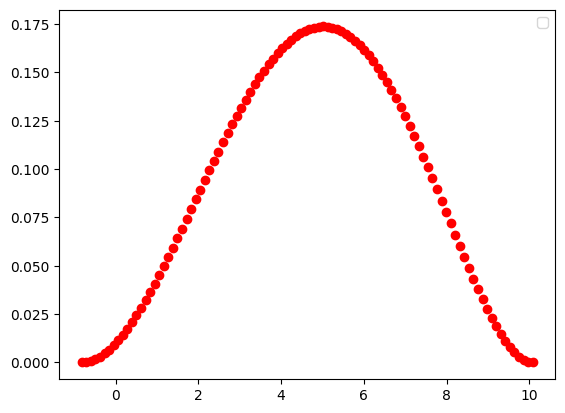

In [15]:
bezierv_conv.plot_pdf(convoluter.data)